## Importing the modules & libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.model_selection import GridSearchCV, train_test_split as tts
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from xgboost import XGBClassifier

In [ ]:
import torch
import intel_extension_for_pytorch as ipex

In [4]:
from pytorch_tabnet.tab_model import TabNetClassifier

In [5]:
def plot_confusion_matrix(y_true, y_pred):
    '''
    Input: (actual labels, predicted labels)
    
    Displays the confustion matrix heatmap of the input confusion matrix
    '''
    conf_mat = confusion_matrix(y_true, y_pred)
    group_names = ['True Negatives','False Postives','False Negatives','True Positives']
    group_counts = [f'{value}' for value in conf_mat.flatten()]
    group_percentages = [f'{round(value*100, 5)}%' for value in conf_mat.flatten()/np.sum(conf_mat)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues')


## Reading the preprocessed data

In [6]:
df = pd.read_csv("preprocessed_water.csv")

In [7]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Target
0,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,2,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.024076e-07,284.641984,2,15.348981,71.220586,0
1,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,3,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,4,11.643467,44.891330,0
2,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,3,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,5,15.249416,69.336671,0
3,7.445251,0.000006,1.702584,162.828458,6.102202e-23,3.742464,1,0.504791,0.054562,0.851326,1.270483,40.853403,273.359662,3.957842,2.863952e-04,365.639045,6,13.966842,45.444798,0
4,8.132455,0.055262,4.288010,94.993978,2.919909e-52,1.770221,3,0.021703,1.111893,0.247116,0.426404,146.073521,265.530096,1.706755,3.083768e-02,266.079565,0,27.920380,68.104498,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120105,7.336513,0.000799,3.807672,89.956213,4.258296e-34,3.027267,2,0.010288,0.745372,0.186357,2.585437,145.362834,533.374053,2.553024,1.428103e-02,1.634232,2,18.610969,82.445237,1
5120106,8.161283,0.000015,6.552120,309.134213,3.368973e-44,2.127818,3,0.201469,3.419696,3.170538,1.931928,43.043399,366.349236,3.180415,7.086033e-04,19.767936,6,26.160882,45.900772,1
5120107,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,2,3.824532,0.541850,0.284838,0.299860,371.261098,339.150786,2.630130,9.608234e-03,545.990529,7,21.436974,70.493951,1
5120108,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,1,1.181166,2.747241,1.367155,3.749374,198.070171,521.505506,3.555576,1.875424e-11,514.136530,1,19.064632,67.052475,1


## Splitting the dataset into training, validation and test sets (70:10:20 ratio)

In [8]:
X = df.drop(columns="Target", axis=1)
y = df["Target"]

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120110 entries, 0 to 5120109
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   pH                      float64
 1   Iron                    float64
 2   Nitrate                 float64
 3   Chloride                float64
 4   Lead                    float64
 5   Zinc                    float64
 6   Color                   int64  
 7   Turbidity               float64
 8   Fluoride                float64
 9   Copper                  float64
 10  Odor                    float64
 11  Sulfate                 float64
 12  Conductivity            float64
 13  Chlorine                float64
 14  Manganese               float64
 15  Total Dissolved Solids  float64
 16  Source                  int64  
 17  Water Temperature       float64
 18  Air Temperature         float64
dtypes: float64(17), int64(2)
memory usage: 742.2 MB


In [10]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5120110 entries, 0 to 5120109
Series name: Target
Non-Null Count    Dtype
--------------    -----
5120110 non-null  int64
dtypes: int64(1)
memory usage: 39.1 MB


In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
X_train, X_valtest, y_train, y_valtest = tts(X, y, test_size=.3, stratify=y, random_state=42)

In [13]:
X_val, X_test, y_val, y_test = tts(X_valtest, y_valtest, test_size=.666, stratify=y_valtest, random_state=42)

---
## Logistic Regression

In [14]:
lr_clf = LogisticRegression(penalty='l2',solver='liblinear')
lr_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [15]:
lr_clf.score(X_valtest, y_valtest)

0.7902050281471817

---
## Decision Tree Classifier

In [16]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_valtest)

In [17]:
print(f"Training accuracy: {dt_clf.score(X_train, y_train)}")
print()
print(f"Testing accuracy: {accuracy_score(y_valtest, y_pred)}")
print(f"Testing f1-score: {f1_score(y_valtest, y_pred)}")

Training accuracy: 1.0

Testing accuracy: 0.8303916647624107
Testing f1-score: 0.7179248980617109


---
## XGBoost Classifier

In [18]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_valtest)

In [19]:
print(f"Training accuracy: {xgb_clf.score(X_train, y_train)}")
print()
print(f"Testing accuracy: {accuracy_score(y_valtest, y_pred)}")
print(f"Testing f1-score: {f1_score(y_valtest, y_pred)}")

Training accuracy: 0.8645785232850746

Testing accuracy: 0.8637867806225518
Testing f1-score: 0.7961777731017943


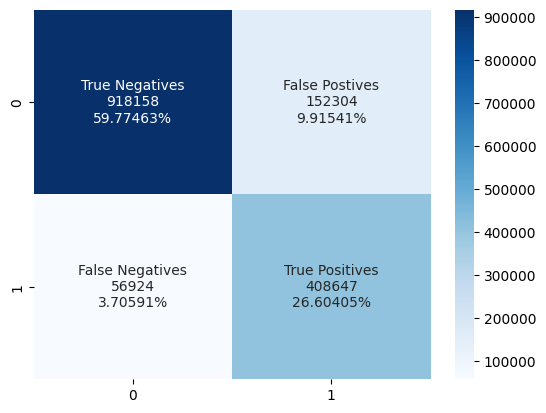

In [20]:
plot_confusion_matrix(y_valtest, y_pred)

In [21]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(10,10,10,10,2))
mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 2))

In [22]:
from sklearn.metrics import accuracy_score
ypred=mlp_clf.predict(X_valtest)
accuracy_score(y_valtest,ypred)

0.8394227207358175

In [23]:

ypred=mlp_clf.predict(X_valtest)
f1 = f1_score(y_valtest, ypred)

print("F1 Score:", f1)

F1 Score: 0.7581368895861933


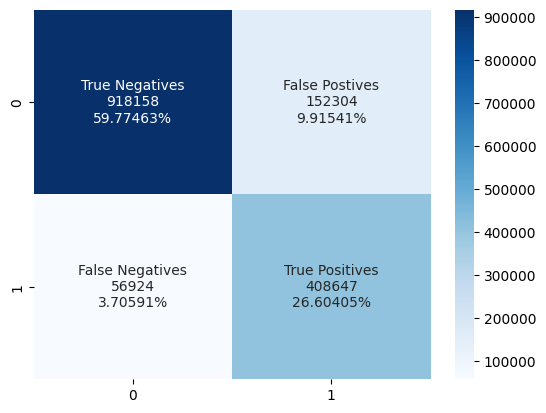

In [24]:
plot_confusion_matrix(y_valtest, y_pred)

---
## TabNet Classifier

In [25]:
tab_clf = TabNetClassifier()

In [27]:
tab_clf.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    max_epochs=10,
)

epoch 0  | loss: 0.32734 | val_0_auc: 0.91081 |  0:02:26s
epoch 1  | loss: 0.30418 | val_0_auc: 0.91458 |  0:04:48s
epoch 2  | loss: 0.29777 | val_0_auc: 0.91473 |  0:06:57s
epoch 3  | loss: 0.29572 | val_0_auc: 0.91441 |  0:09:11s
epoch 4  | loss: 0.29473 | val_0_auc: 0.91462 |  0:11:42s
epoch 5  | loss: 0.29379 | val_0_auc: 0.91436 |  0:14:10s
epoch 6  | loss: 0.29232 | val_0_auc: 0.91494 |  0:16:55s
epoch 7  | loss: 0.29188 | val_0_auc: 0.9154  |  0:19:27s
epoch 8  | loss: 0.29166 | val_0_auc: 0.91527 |  0:21:54s
epoch 9  | loss: 0.29166 | val_0_auc: 0.91476 |  0:24:18s
Stop training because you reached max_epochs = 10 with best_epoch = 7 and best_val_0_auc = 0.9154


KeyboardInterrupt: 

### The above cell had to be stopped manually after the completion of all the epochs.

In [28]:
y_pred = tab_clf.predict(X_test)

In [29]:
print(f"Testing accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Testing f1-score: {f1_score(y_test, y_pred)}")

Testing accuracy: 0.8728511688194894
Testing f1-score: 0.8155026928581458


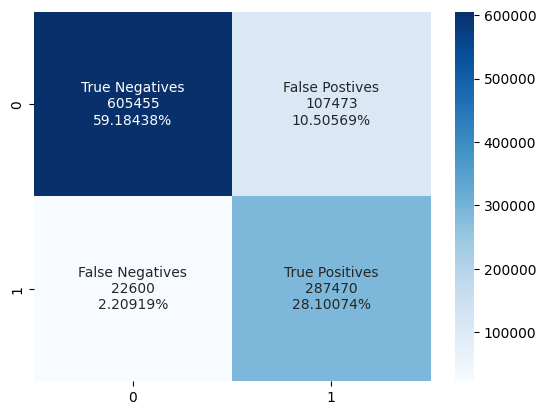

In [30]:
plot_confusion_matrix(y_test, y_pred)

# Ensemble Method

In [ ]:
X_train_1, X_temp, y_train_1, y_temp = tts(X_train, y_train, test_size=.66, stratify=y_train, random_state=42)
X_train_2, X_train_3, y_train_2, y_train_3 = tts(X_temp, y_temp, test_size=.5, stratify=y_temp, random_state=42)

In [ ]:
def train_tabnet(X_train_, y_train_):
    clf = TabNetClassifier()
    clf.fit(
        X_train_, y_train_,
        max_epochs=5,
    )
    return clf

def ensemble(Xs, ys):
    clfs = [train_tabnet(Xs[i], ys[i]) for i in range(len(Xs))]
    return clfs

In [ ]:
Xs = [X_train_1, X_train_2, X_train_3]
ys = [y_train_1, y_train_2, y_train_3]

In [ ]:
clfs = ensemble(Xs, ys)

In [ ]:
y_preds = []
for each in clfs:
    y_preds.append(each.predict(X_valtest))

In [ ]:
y_final = []
for each in range(len(y_valtest)):
    y_final.append(mode([y[each] for y in y_preds]))

In [ ]:
accuracy_score(y_final, y_valtest)

In [ ]:
f1_score(y_valtest, y_final)

---
# Final Pipeline

In [ ]:
X_train_1, X_temp, y_train_1, y_temp = tts(X, y, test_size=.66, stratify=y, random_state=42)
X_train_2, X_train_3, y_train_2, y_train_3 = tts(X_temp, y_temp, test_size=.5, stratify=y_temp, random_state=42)


Xs = [X_train_1, X_train_2, X_train_3]
ys = [y_train_1, y_train_2, y_train_3]

clfs = ensemble(Xs, ys)

In [ ]:
def Final_Pipeline(X_test):

    X_test.drop(['Index'], axis=1)
    X_test = X_test.fillna(np.nan)
    drop_column_rows = ['Iron', 'Nitrate', 'Lead', 'Color', 'Turbidity', 'Odor', 'Chlorine', 'Total Dissolved Solids', 
    'Source', 'Air Temperature', 'Month', 'Day', 'Time of Day']

    for each in drop_column_rows:
        X_test = X_test[pd.notna(X_test[each])]

    X_test['pH'].fillna(np.mean(X_test['pH']), inplace=True)
    
    fillna_cols = ['pH', 'Chloride', 'Zinc', 'Fluoride', 'Copper', 'Sulfate', 'Conductivity', 'Manganese', 'Water Temperature']
    
    for each in fillna_cols:
        X_test[each].fillna(np.mean(X_test[each]), inplace=True)
    
    sourceslist = list(np.unique(X_test.Source))
    sourceslist.sort()

    replacesourceslist = [each for each in range(len(sourceslist))]

    colorslist = []
    replacecolorslist = []

    for each in colors:
        colorslist.append(each)
        replacecolorslist.append(colors[each])

    X_test['Color'].replace(colorslist, replacecolorslist, inplace=True)
    X_test['Source'].replace(sourceslist, replacesourceslist, inplace=True)

    X_test = X_test.drop(['Month', 'Day', 'Time of Day'], axis=1)

    y_preds = []
    for each in clfs:
        y_preds.append(each.predict(X_test))

    return y_preds